In [1]:
import numpy as np
import pandas as pd

In [2]:
g1 = pd.DataFrame(np.random.randint(80,100, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g2 = pd.DataFrame(np.random.randint(70,79, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g3 = pd.DataFrame(np.random.randint(60,69, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g4 = pd.DataFrame(np.random.randint(50,59, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g5 = pd.DataFrame(np.random.randint(40,49, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g6 = pd.DataFrame(np.random.randint(33,39, size=(800000,5)), columns = ["s1",'s2','s3','s4','s5'])
g7 = pd.DataFrame(np.random.randint(0,32, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])

df = pd.concat([g1,g2,g3,g4,g5,g6,g7])
print(len(df))
df = df.drop_duplicates()# get all unique records
print(len(df))
df.head()

1040000
203712


,s1,s2,s3,s4,s5
0,92,98,86,92,90
1,88,82,96,98,98
2,85,94,97,89,94
3,90,94,96,98,96
4,93,99,93,92,95


In [3]:
df.tail()

,s1,s2,s3,s4,s5
39995,31,24,23,11,22
39996,10,31,20,2,5
39997,5,30,6,25,15
39998,22,7,4,26,12
39999,12,10,10,19,27


# Symbolic AI

In [4]:
def grade(sb1,sb2, sb3, sb4, sb5):
    total = 500
    obtain = sb1 + sb2 + sb3 + sb4 + sb5
    per = (obtain / total) * 100
    
    grade = None
    
    if per >= 80:
        grade = "A+"
    elif per >= 70:
        grade = "A"
    elif per >= 60:
        grade = "B"
    elif per >= 50:
        grade = "C"
    elif per >= 40:
        grade = "D"
    elif per >= 33:
        grade = "E"
    else:
        grade = "Fail"
        
    return total, obtain , per , grade

# df[["Total","Obtained","Percentage","Grade"]] = df[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(*x), axis=1, result_type='expand')
df[["Total","Obtained","Percentage","Grade"]] = df[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(x[0],x[1],x[2],x[3],x[4]), axis=1, result_type='expand')
df

,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade
0,92,98,86,92,90,500,458,91.6,A+
1,88,82,96,98,98,500,462,92.4,A+
2,85,94,97,89,94,500,459,91.8,A+
3,90,94,96,98,96,500,474,94.8,A+
4,93,99,93,92,95,500,472,94.4,A+
...,...,...,...,...,...,...,...,...,...
39995,31,24,23,11,22,500,111,22.2,Fail
39996,10,31,20,2,5,500,68,13.6,Fail
39997,5,30,6,25,15,500,81,16.2,Fail
39998,22,7,4,26,12,500,71,14.2,Fail


In [5]:
df.Grade.value_counts()

Fail    39974
A+      39767
D       29090
C       29053
B       29040
A       29012
E        7776
Name: Grade, dtype: int64

<AxesSubplot:>

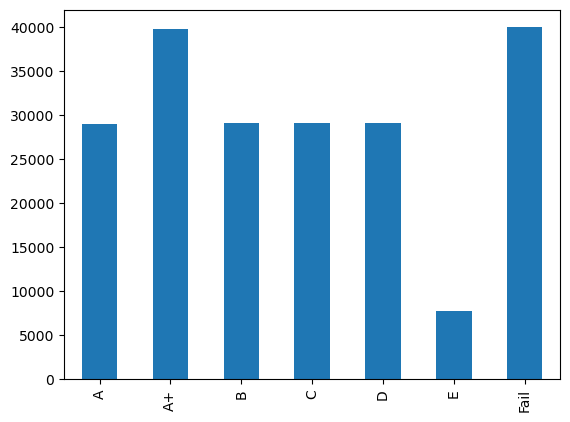

In [8]:
df.Grade.value_counts().sort_index().plot(kind='bar')

In [9]:
df[df.duplicated()]

,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade


In [18]:
df.Grade.unique()

array(['A+', 'A', 'B', 'C', 'D', 'E', 'Fail'], dtype=object)

In [16]:
df[df.Grade=='B']

,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade
0,64,68,63,67,60,500,322,64.4,B
1,60,63,68,60,63,500,314,62.8,B
2,68,68,64,63,65,500,328,65.6,B
3,60,60,63,68,68,500,319,63.8,B
4,65,62,65,66,60,500,318,63.6,B
...,...,...,...,...,...,...,...,...,...
39989,62,66,63,68,63,500,322,64.4,B
39990,62,62,67,66,64,500,321,64.2,B
39993,64,63,60,64,65,500,316,63.2,B
39996,64,60,63,63,62,500,312,62.4,B


In [13]:
df1 = pd.DataFrame()
test = pd.DataFrame()
for i in df.Grade.unique():
    df1 = pd.concat([df1,df[df.Grade==i].head(7676)]) # train
    test = pd.concat([test,df[df.Grade==i].tail(100)]) #test
print(len(df1), 7676*7)
print(len(test))

53732 53732
700


In [20]:
df1.tail()

,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade
7671,2,12,8,1,31,500,54,10.8,Fail
7672,29,31,12,26,2,500,100,20.0,Fail
7673,6,24,13,19,13,500,75,15.0,Fail
7674,9,26,10,12,16,500,73,14.6,Fail
7675,22,0,3,21,26,500,72,14.4,Fail


In [34]:
df1.head().sample(frac=1)

,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade
0,92,98,86,92,90,500,458,91.6,A+
2,85,94,97,89,94,500,459,91.8,A+
4,93,99,93,92,95,500,472,94.4,A+
1,88,82,96,98,98,500,462,92.4,A+
3,90,94,96,98,96,500,474,94.8,A+


# Create data for ML and DL

In [35]:
data = df1[["s1","s2","s3",'s4','s5','Grade']].copy()
data = data.sample(frac=1)
data

,s1,s2,s3,s4,s5,Grade
7293,78,71,72,75,77,A
11408,38,34,38,34,38,E
3924,4,10,27,2,19,Fail
4248,50,51,54,56,56,C
6628,73,70,75,72,73,A
...,...,...,...,...,...,...
7163,64,68,60,61,63,B
3669,21,24,16,18,27,Fail
2401,51,58,50,55,55,C
2756,78,78,70,72,77,A


In [36]:
X = data.loc[:,"s1":"s5"]
X

,s1,s2,s3,s4,s5
7293,78,71,72,75,77
11408,38,34,38,34,38
3924,4,10,27,2,19
4248,50,51,54,56,56
6628,73,70,75,72,73
...,...,...,...,...,...
7163,64,68,60,61,63
3669,21,24,16,18,27
2401,51,58,50,55,55
2756,78,78,70,72,77


In [37]:
Y = data['Grade']
Y

7293        A
11408       E
3924     Fail
4248        C
6628        A
         ... 
7163        B
3669     Fail
2401        C
2756        A
6309        A
Name: Grade, Length: 53732, dtype: object

# Why we apply one-hot-encode on multiclass classfication output

In [38]:
Y1 = pd.get_dummies(Y)
Y1

,A,A+,B,C,D,E,Fail
7293,1,0,0,0,0,0,0
11408,0,0,0,0,0,1,0
3924,0,0,0,0,0,0,1
4248,0,0,0,1,0,0,0
6628,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
7163,0,0,1,0,0,0,0
3669,0,0,0,0,0,0,1
2401,0,0,0,1,0,0,0
2756,1,0,0,0,0,0,0


In [39]:
Y1.drop_duplicates()

,A,A+,B,C,D,E,Fail
7293,1,0,0,0,0,0,0
11408,0,0,0,0,0,1,0
3924,0,0,0,0,0,0,1
4248,0,0,0,1,0,0,0
5061,0,0,1,0,0,0,0
1024,0,1,0,0,0,0,0
5259,0,0,0,0,1,0,0


<img src = "https://camo.githubusercontent.com/b58d0e55e0c4746365bcd37b69878387f0b05b3fb79cb4d70d3a50673d0ea8c1/68747470733a2f2f69302e77702e636f6d2f73656d69656e67696e656572696e672e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031382f30312f4d4c7673444c2e706e673f73736c3d31">


# Now apply Deep Learning

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

# Create Model

In [ ]:
print(X.head(1).values[0])
print(X.head(1).values[0].shape)

# Multi classification problem

In [ ]:
model = Sequential()

#               32  = output should be power 2 value 2,4,8,16,32,......
model.add(Dense(32 , activation='relu' ,input_shape=(5,))) #input layer
model.add(Dense(16, activation='relu')) # hidden layer
model.add(Dense(7, activation='softmax'))# outlayer 7= unique output classes, softmax->7 probility this sum always = 1

In [ ]:
model.summary()

# Compilation Steps

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.002), 
              loss='categorical_crossentropy',
              metrics=['acc'])

                

# Now Start Training

In [ ]:
model.fit(X,Y1, epochs=80)

# Now Generate new data for Testing

In [ ]:
test[["Total","Obtained","Percentage","Grade"]] = test[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(*x), axis=1, result_type='expand')
test.head()

test_X, test_Y = test.loc[:,"s1":"s5"], pd.get_dummies(test['Grade'])
display(test_X)
display(test_Y)

# Test on Testing data

In [ ]:
model.evaluate(test_X,test_Y)

# prediction with model

In [ ]:
Y_predict = model.predict(test_X)
Y_predict[0]

# apply post processing to get out human readable

In [ ]:
np.argmax(Y_predict[0]) # return maximum value index number

In [ ]:
display(test_Y.head(5))
display(test_Y.columns)
display(test_Y.columns[6])
# display(test_Y.columns[np.argmax(Y_predict[0])])

In [ ]:
labels = ['A', 'A+', 'B', 'C', 'D', 'E', 'Fail']
Y_predict3 = [labels[j] for j in [np.argmax(i) for i in model.predict(test_X)]]
Y_predict3

In [ ]:
labels = ['A', 'A+', 'B', 'C', 'D', 'E', 'Fail']
Y_predict2 = pd.DataFrame(model.predict(test_X)).apply(lambda x:labels[np.argmax(x)],axis=1)
Y_predict2

In [ ]:
test['prediction'] = Y_predict3
test

In [ ]:
test.iloc[200:].head(60)

In [ ]:
test[test['Grade'] == test['prediction']]